In [14]:
from tensorflow.keras.models import load_model
from find_pet_on_photo import find_pet
import cv2
import os
import numpy as np
import pickle
from IPython.display import Image as IMG
from PIL import Image, ImageDraw
import time

### Подгружаем сохранённые ранее модели классификации и известные породы

In [2]:
model_cat = load_model('model_cats.h5')
model_dog = load_model('model_dogs.h5')

In [5]:
with open('list_of_cat_breeds.pickle', 'rb') as f:
    breeds_cat =  pickle.load(f)

with open('list_of_dog_breeds.pickle', 'rb') as f:
    breeds_dog =  pickle.load(f)

### Метод, определяющий вид и породу

In [12]:
def take_a_pet(img_way, find_pet_model):
    pet = find_pet_model.pet_detection(img_way)
    
    image = cv2.imread(img_way, cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    img_out = Image.fromarray(image, 'RGB')
    draw = ImageDraw.Draw(img_out)
    
    points = pet[0]['rois'][0]
    rectangle = [points[1], points[0], points[3], points[2]]
    draw.rectangle(rectangle, outline="green", width=5)
    img_out.show()
    
    if pet[0]['class_ids'][0] == 16:
        dim = (300, 300)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        image = np.array(image, dtype="float") / 255.0
        image = np.expand_dims(image, 0)
        what_breed = model_cat.predict(image)
        what_breed = breeds_cat[np.argmax(what_breed)]
        print ('Cat: ', what_breed)
    else:
        dim = (224, 224)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        image = np.array(image, dtype="float") / 255.0
        image = np.expand_dims(image, 0)
        what_breed = model_dog.predict(image)
        what_breed = breeds_dog[np.argmax(what_breed)]
        print ('Dog: ', what_breed)

Создание экзеспляра класса для определения вида

In [8]:
home_dir = os.path.realpath('')
pet_model = find_pet(home_dir + '/mask_rcnn_coco.h5')

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead


### Тестирование на примерах

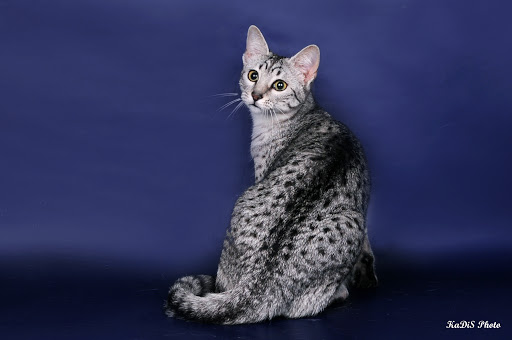

In [15]:
cat_test1 = 'egypt_mau.jpg'
IMG(cat_test1)

In [16]:
take_a_pet(cat_test1, pet_model)
time.sleep(5)


Cat:  Egyptian_Mau


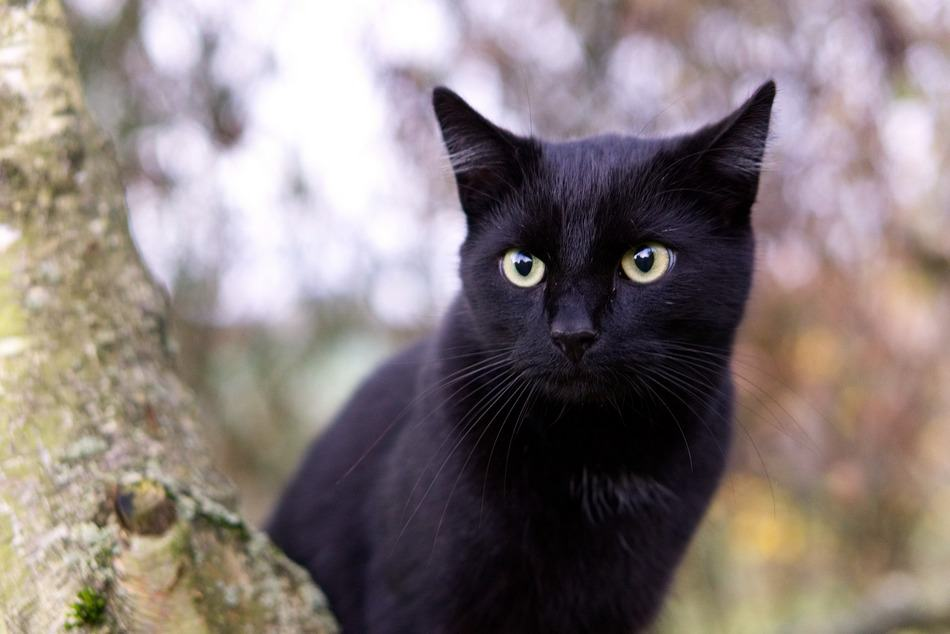

In [17]:
cat_test2 = 'bombay.jpg'
IMG(cat_test2)

In [18]:
take_a_pet(cat_test2, pet_model)
time.sleep(5)


Cat:  Bombay


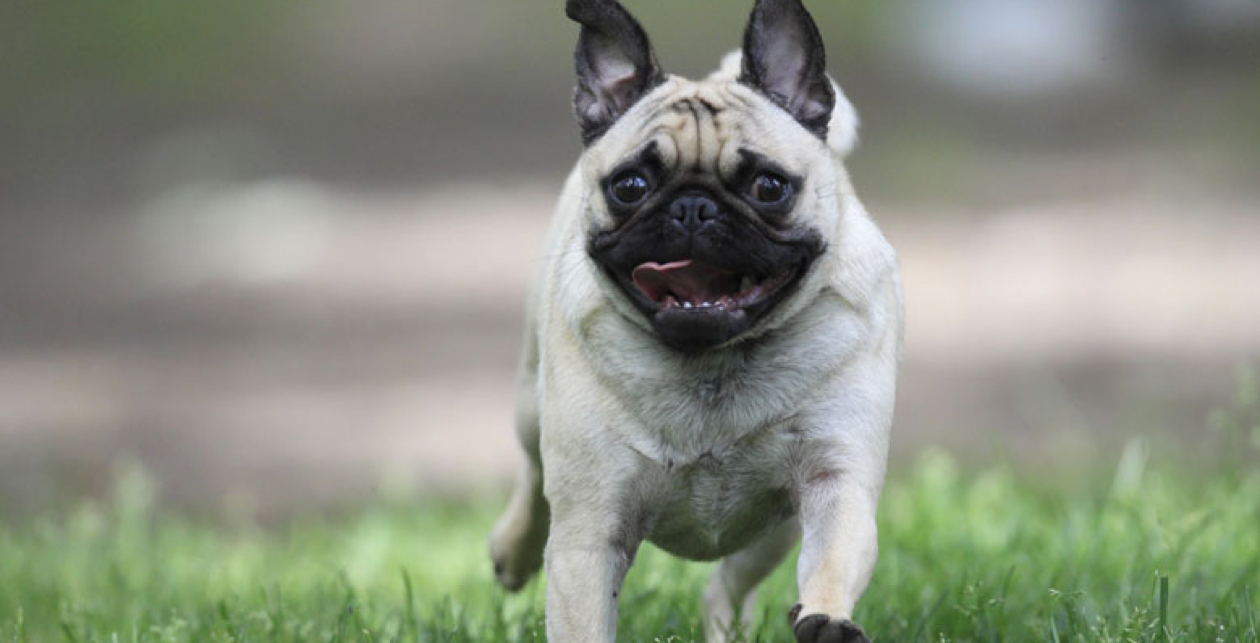

In [19]:
dog_test1 = 'pug.jpg'
IMG(dog_test1)

In [20]:
take_a_pet(dog_test1, pet_model)
time.sleep(5)


Dog:  pug


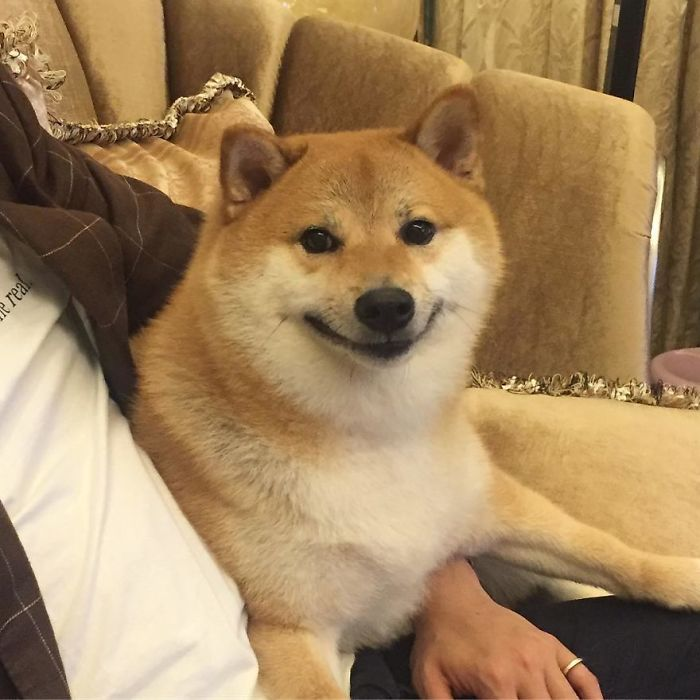

In [23]:
dog_test2 = 'shiba_inu.jpg'
IMG(dog_test2)

In [24]:
take_a_pet(dog_test2, pet_model)
time.sleep(5)


Dog:  shiba_inu
